<a href="https://colab.research.google.com/github/fedhere/DSPS/blob/master/KS_earthquakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created by FedericaBBianco @fedhere September 2019 for UDel PHYS467/667
# Kolmogorov Smirnoff test, application to earthquake data

In [3]:
#all the imports I needed
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import scipy as sp
from scipy import stats
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


This homework asks you to reproduce the work in [Corral 2018](https://arxiv.org/pdf/0910.0055.pdf) which is well described, but not "reproducible". 
Corral 2018 uses a K-S test to show that at different magnitude scales the time gaps between earthquakes follows the same distribution. If true, this indicates that there is a consistent scaling law. 

The argument is a little convoluted, but it is a somewhat innovative use of the test. Corall compares the time gap between earthquakes  greater than a certain magnitude threshold with the time gaps between earthquakes above a different threshold, and finds no differences.

Remind yourself exactly what the K-S test is about :

    1 What is the test's Null Hypothsis that the K-S test tests?
    
    


K-S test tests the Null Hypothesis that the two data samples originates from same parent distribution.



    2 What is the "statistic" or "pivotal quantity" that the test uses?
    


K-S test uses the maximum difference between empirical distribution functions of samples in cumulative space as the "statistic" or "pivotal quantity".




    3 What does the probability distribution of this statistic depend on? 
    
   


The probability distribution of this statistic depends on the size of sample (N) and distance between empirical distributions in cumulative space.



    

# Data Retrival

The first reason why the paper is not techincally _reproducible_ is that, while a link is provided to retrieve the data, the link is dead. This happens often. Services like [Zenodo](https://zenodo.org/) or journals that serve data provide some insurance against this but unfortunately the standards are not strict. 

If you are taking this class as 667 retrieve the data yourself from [this website](http://service.scedc.caltech.edu/eq-catalogs/poly.php). Make sure the number of entries in your final dataset is similar to that of the authors. I got 70798, instead of 77000. 10% off, which I deem close enough. You should get something similar. Use the map in the paper to determine the region of interest. Call the file earthquakes_\<firstinitialLastname\>.csv and upload it to your github repository. Read it your file, instead of mine as instructed below. If you are getting weird results compare to what I got, go back and check how the files differ.

# Data Ingestion

## read in data

I saved the data in a file called "earthquakes.csv", where ```csv``` stands for "comma separated file". [This file format](https://www.howtogeek.com/348960/what-is-a-csv-file-and-how-do-i-open-it/) requires different entries in a row to be separated by commas alone (no space) and for commas to be used in quote if they are not intended to separate entries. 

```
a,b,c
d,e,f
g,"h,2",i
```
The data is uploaded on the  github homework repository but to read it in you will need to get the link to the *raw file*: the link to the file https://github.com/fedhere/DSPS/blob/master/HW3/earthquakes.csv  takes you to an ```html``` page that includes the content of the file, but you want to isolate the content of the file itself: the _raw file_. Pay attention to this: from the next time I will not give you the exact link, I will just point you to the file and you will have to find the link to the raw data from there. 
https://raw.githubusercontent.com/fedhere/DSPS/master/HW3/earthquakes.csv

The data can be read effectively using the _pandas_ python package as ```pandas.read_csv(<file name or URL>)```. 

However, I did not format the data correctly, according to the csv extension requirement. This happens all the time. Look at the file and use the pandas documentation to figure out how to read it with ```pd.read_csv()```

In [0]:
eqdata=pd.read_csv("https://raw.githubusercontent.com/narayan-paudel/DSPS_EPAUDEL/master/HW3_ePaudel/earthquakes_ePaudel.csv",sep=' ')

running the following lines of code should give you the same result as mine if you used the file I provided (467 students), and qualitatively  similar if you are using your own data (667 students)

In [6]:
eqdata.shape

(70798, 34)

In [7]:
eqdata.head()

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,Unnamed: 5,M,Unnamed: 7,Unnamed: 8,Unnamed: 9,LAT,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,LON,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,DEPTH,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,NaN,l,2.02,c,NaN,NaN,33.246,-116.433,NaN,NaN,1.6,C,NaN,NaN,NaN,28255.0,NaN,NaN,13.0,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1984/01/01,05:31:34.16,eq,NaN,l,2.12,c,NaN,NaN,32.945,-116.295,NaN,NaN,5.4,C,NaN,NaN,NaN,28259.0,NaN,NaN,18.0,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1984/01/01,06:59:05.14,eq,NaN,l,2.43,c,NaN,NaN,33.343,-117.628,NaN,NaN,5.6,C,NaN,NaN,NaN,28260.0,NaN,NaN,13.0,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1984/01/01,11:10:25.29,eq,NaN,l,2.07,c,NaN,NaN,33.668,-116.780,NaN,13.8,C,NaN,NaN,NaN,28270.0,NaN,NaN,19.0,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984/01/01,19:38:19.79,eq,NaN,l,2.13,c,NaN,NaN,33.963,-116.290,NaN,NaN,2.7,C,NaN,NaN,NaN,28553.0,NaN,NaN,40.0,NaN,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
eqdata.describe()

,GT,Unnamed: 5,Unnamed: 7,Unnamed: 8,Unnamed: 9,LAT,Unnamed: 11,Unnamed: 12,Unnamed: 15,Unnamed: 16,LON,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,DEPTH,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
count,0.0,70798.000000,0.0,0.0,70798.000000,70798.00000,0.0,9648.000000,7.359000e+03,4.628900e+04,14096.000000,10889.000000,43932.000000,21302.000000,33735.000000,18080.000000,12705.000000,3387.000000,469.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,2.417826,NaN,NaN,33.977749,-116.88145,NaN,13.354343,6.097558e+06,4.482677e+06,524649.772205,16307.082193,43.634321,141.903530,203.562443,78.426383,55.085714,43.415412,14.746269,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.407683,NaN,NaN,1.156586,1.07667,NaN,2.724517,4.441852e+06,3.130379e+06,281055.136911,25237.230734,121.795817,311.415589,155.337382,56.105321,30.519535,24.266088,17.013243,2.828427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2.000000,NaN,NaN,30.094830,-121.76000,NaN,10.000000,1.000432e+06,1.070000e+02,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.120000,NaN,NaN,33.061000,-117.69200,NaN,11.200000,3.041641e+06,3.031237e+06,136998.250000,27.000000,18.000000,14.000000,113.000000,48.000000,33.000000,24.000000,0.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.300000,NaN,NaN,34.056750,-116.59000,NaN,12.800000,3.229114e+06,3.110080e+06,703081.500000,57.000000,28.000000,23.000000,168.000000,70.000000,50.000000,38.000000,13.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.590000,NaN,NaN,34.591000,-116.25100,NaN,14.900000,9.669999e+06,9.027968e+06,725926.500000,37764.000000,42.000000,137.000000,294.000000,92.000000,71.000000,61.000000,24.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,7.100000,NaN,NaN,37.985500,-113.71900,NaN,29.300000,3.736673e+07,9.875061e+06,754723.000000,71774.000000,3384.000000,3815.000000,1574.000000,996.000000,227.000000,145.000000,88.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


now that you have a dataframe object you can use methods of the object to modify it. Use the method ```eqdata.rename``` to change the names of the 3 columns that are the only three relevant to us: _date, time, magnitude_

## prepare date-time column

In [0]:
eqdata=eqdata.rename(columns={'#YYY/MM/DD':'date','HH:mm:SS.ss':'time','Unnamed: 5':'magnitude'})

In [0]:
eqdata=eqdata[['date','time','magnitude']]

In [11]:
eqdata.head()

,date,time,magnitude
0,1984/01/01,01:30:57.52,2.02
1,1984/01/01,05:31:34.16,2.12
2,1984/01/01,06:59:05.14,2.43
3,1984/01/01,11:10:25.29,2.07
4,1984/01/01,19:38:19.79,2.13


In [12]:
eqdata.describe()

,magnitude
count,70798.000000
mean,2.417826
std,0.407683
min,2.000000
25%,2.120000
50%,2.300000
75%,2.590000
max,7.100000


Now you want to combine the columns containing date and time and convert them to a "datetime" kind of data object. 


What data type are the _time_ and _date_ columns right now? What tyoe you want them to be to conver them to datetime with ```pd.datetime()```?

In [13]:
eqdata.time.dtype, eqdata.date.dtype

(dtype('O'), dtype('O'))

In [14]:
# combining date and time columns
eqdata["Datetime"] = (eqdata.date +" "+ eqdata.time)
eqdata.head()

,date,time,magnitude,Datetime
0,1984/01/01,01:30:57.52,2.02,1984/01/01 01:30:57.52
1,1984/01/01,05:31:34.16,2.12,1984/01/01 05:31:34.16
2,1984/01/01,06:59:05.14,2.43,1984/01/01 06:59:05.14
3,1984/01/01,11:10:25.29,2.07,1984/01/01 11:10:25.29
4,1984/01/01,19:38:19.79,2.13,1984/01/01 19:38:19.79


to do this conversion I 

   1 joined date and time into a single string for each row with a ["list comprehension"](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python) (essentially a for loop but more efficient and compact). You do not have to do it with a list comprehension, you can use just a for loop.

   2 used pd.datetime() to convert the resulting new dataframe column into a dataframe column containing _datetime_ objects (see lab)

   3 but this did not work because of the formatting of some dates, so I had to go back and fix 5 entries. (you are on your own to figure out this one)

In [15]:
#code used to catch the rows with 60 seconds. This code stops everytime it encounters an error.
'''
for i in range(0,70798):
  print(i)
  eqdata['datetime'] = pd.to_datetime(eqdata["Datetime"][i], infer_datetime_format=True)'''
#DATA rows edited 1725, 25540, 34229, 50213, 59505
  

'\nfor i in range(0,70798):\n  print(i)\n  eqdata[\'datetime\'] = pd.to_datetime(eqdata["Datetime"][i], infer_datetime_format=True)'

In [0]:
eqdata['datetime'] = pd.to_datetime(eqdata["Datetime"], infer_datetime_format=True)
eqdata=eqdata[['date','time','magnitude','datetime']]

In [17]:
eqdata.head()

,date,time,magnitude,datetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790


## select valuable data

Following the description in Section 2  of Corral 2018 I removed all data that did not belong to a "stationary" period. Third paragraph section 2 of Corral 2018. You can see the cell of code I used to do this [here](https://github.com/fedhere/DSPS/blob/master/HW3/Corral2018_selectStationary.py) at no points cost, cause it was a bit tricky, but I encourage you to try and do it yourself. If you can do it in fewer lines than I did its automatically +5 points (just turning the loop into a list comprehension does not count. That is an obvious way to decrease the number of lines of code; I did not do it simply to enhance readability.)

In [0]:
############
# create empty container
ss = []

# loop through all year pairs as year and fraction of year
for t in [(1984, 1986.5), 
          (1990.3, 1992.1), 
          (1994.6, 1995.6),
          (1996.1,1996.5), 
          (1997,1997.6), 
          (1997.75,1998.15), 
          (1998.25,1999.35), 
          (2000.55,2000.8),
          (2000.9 ,2001.25), 
          (2001.6 ,2002), 
          (2002.5 ,2003)]:
    
    # for each pair I convert the year to datetime (easy)
    # then I convert the fraction of year and convert it to days and convert that to a delta-time
    # finally I add that deltatime to the year datetime. 
    ss.append((pd.to_datetime(int(t[0]), format="%Y") 
        + pd.Timedelta('%.f days'%((t[0] - int(t[0])) * 365.25)),
               pd.to_datetime(int(t[1]), format="%Y") 
        + pd.Timedelta('%.f days'%((t[1] - int(t[1])) * 365.25))))




In [20]:
print ("the {} timestamp pairs that are the boundaries of good data periods are:".format(len(ss)))



the 11 timestamp pairs that are the boundaries of good data periods are:


The following cell of code shows you the array of bool values (True/False) which I create to use as an index to the input array: when used as an index, a technique called "broadcasting" in python, will select only elements of the original array where the index array value is True. something like 
Try:



In [0]:
a = np.array([0, 1, 2])
a, a[[True, False, True]]

(array([0, 1, 2]), array([0, 2]))

For each of the 11 valid periods I create a condition 
``` datetime >= period_start AND datetime <= period_end ``` where AND is a product of booleans: True * False = False.

I want to take all chinks of data that satisfy this condition for any of the 11 chunks of time so that is a logical OR operator, or a sum of Booleans: True + False = True 

This is because ```True``` really corresponds to "not 0" and False to "0". So ```"not 0" * 0 = 0``` and ```"not 0" + 0 = not 0```
    

In [21]:
############
# data between start and end of first time period
gooddates = (((eqdata.datetime >= ss[0][0]) * (eqdata.datetime <= ss[0][1])) +\
        # data between start and end of second time period
        ((eqdata.datetime >=ss [1][0]) * (eqdata.datetime <= ss[1][1])) +\
        ((eqdata.datetime >=ss [2][0]) * (eqdata.datetime <= ss[2][1])) +\
        ((eqdata.datetime >=ss [3][0]) * (eqdata.datetime <= ss[3][1])) +\
        ((eqdata.datetime >=ss [4][0]) * (eqdata.datetime <= ss[4][1])) +\
        ((eqdata.datetime >=ss [5][0]) * (eqdata.datetime <= ss[5][1])) +\
        ((eqdata.datetime >=ss [6][0]) * (eqdata.datetime <= ss[6][1])) +\
        ((eqdata.datetime >=ss [7][0]) * (eqdata.datetime <= ss[7][1])) +\
        ((eqdata.datetime >=ss [8][0]) * (eqdata.datetime <= ss[8][1])) +\
        ((eqdata.datetime >=ss [9][0]) * (eqdata.datetime <= ss[9][1])) +\
        # data between start and end of last time period
        ((eqdata.datetime >=ss [10][0]) * (eqdata.datetime <= ss[10][1])\
        ).values)
gooddates


/usr/local/lib/python2.7/dist-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/usr/local/lib/python2.7/dist-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
         ... 
70768    True
70769    True
70770    True
70771    True
70772    True
70773    True
70774    True
70775    True
70776    True
70777    True
70778    True
70779    True
70780    True
70781    True
70782    True
70783    True
70784    True
70785    True
70786    True
70787    True
70788    True
70789    True
70790    True
70791    True
70792    True
70793    True
70794    True
70795    True
70796    True
70797    True
Name: datetime, Length: 70798, dtype: bool

In [22]:
print ("there are {} earthquakes falling in the selected stationary periods".
       format(gooddates.sum()))

there are 18852 earthquakes falling in the selected stationary periods


In [0]:
# broadcasting to create a dataframe with the good dates only
eqGoodData=eqdata[gooddates]

In [24]:
eqGoodData.shape

(18852, 4)

In [25]:
eqGoodData.head()

,date,time,magnitude,datetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790


Now what you really want is the _time interval between earthquakes_ for all events greater than some magnitude m, while all you have are the date and time of the events.: 

You can remove earthquakes smaller than magnitude 2 by, again, broadcasting. How would that look like?

In [0]:
# to remove earthquakes smaller than magnitude 2
eqGoodData=eqGoodData[eqGoodData['magnitude']>=2]

In [29]:
eqGoodData.shape #look like for my data it was not needed! that is because I chose M>2 when when I downloaded the data

(18852, 4)

You can get the time between consecutive earthquakes with the method ```diff()``` of numpy arrays (in a pandas series you can get the data as a numpy array with the attribute .values: ```seried.values```). 


In [0]:
## This part of the code is to find the gaps. In the mathod we applied we got N-1 gaps for N values. so we append
## an extra value by hand to be consistant with the results already given in the notebook but afterwords we
## deleted that entry.

## we have written a function to get Good data with gaps at the end but leaving this piece of code
## here for completeness.

#to get the time intervals
gaps=np.diff(eqGoodData['datetime'].values).astype(float)
eqGoodData['gaps']=np.insert(gaps,0,0.0)

In [39]:
eqGoodData.shape

(18851, 5)

In [40]:
eqGoodData.head()

,date,time,magnitude,datetime,gaps
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,0.000000e+00
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,5.250980e+12
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,1.508015e+13
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,3.047450e+13
5,1984/01/01,19:39:19.67,2.13,1984-01-01 19:39:19.670,5.988000e+10


In [41]:
eqGoodData.describe()

,magnitude,gaps
count,18851.000000,1.885100e+04
mean,2.399508,3.180247e+13
std,0.392437,1.103955e+15
min,2.000000,0.000000e+00
25%,2.110000,2.736565e+12
50%,2.290000,8.946280e+12
75%,2.570000,2.133972e+13
max,5.800000,1.199632e+17


In [42]:
eqGoodData.head()

,date,time,magnitude,datetime,gaps
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,0.000000e+00
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,5.250980e+12
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,1.508015e+13
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,3.047450e+13
5,1984/01/01,19:39:19.67,2.13,1984-01-01 19:39:19.670,5.988000e+10


In [43]:
eqGoodData.describe()

,magnitude,gaps
count,18851.000000,1.885100e+04
mean,2.399508,3.180247e+13
std,0.392437,1.103955e+15
min,2.000000,0.000000e+00
25%,2.110000,2.736565e+12
50%,2.290000,8.946280e+12
75%,2.570000,2.133972e+13
max,5.800000,1.199632e+17


Note that the first entry will be NaT which is Not a Time (corresponding to nan for numerical variables) or maybe a negative number (depends on your exact operations above). You should remove it

In [0]:
# removing the first row of data
eqGoodData=eqGoodData.iloc[1:]

In [46]:
eqGoodData.head()

,date,time,magnitude,datetime,gaps
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,5.250980e+12
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,1.508015e+13
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,3.047450e+13
5,1984/01/01,19:39:19.67,2.13,1984-01-01 19:39:19.670,5.988000e+10
6,1984/01/01,20:19:47.21,2.02,1984-01-01 20:19:47.210,2.427540e+12


# data exploration
At this point you should wonder if this is the final dataset that you want to use and if anything is weird or suspicious about it. Visualize the distribution. A good way to visualize distributions is a histogram which you can prodice with pl.hist() or as a method of your dataframe series as ```df[SeriesName].plot(kind="hist")```. Produce a plot like the one below (label the axis! and describe it with a caption!). To get the logarithmic y axis you can se ```logy=True```, for example. in your ```df[SeriesName].plot``` call.

Text(0.5,0,'time gaps(ns)')

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'["sans-serif"]'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


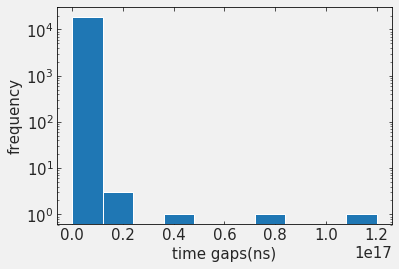

In [47]:
ax=eqGoodData['gaps'].plot(kind="hist",logy="True")
ax.set_ylabel('frequency')
ax.set_xlabel('time gaps(ns)')

The thing that worries me is that by removing some sections of the data to use only stationary periods we created some artificially large gaps: gaps of order ~month. How many nanoseconds in a month? remove all gaps that are larger than about a month and see how the distribution looks (make another histogram).

In [48]:
# removal of gaps greater than month 
month_in_ns=30*24*60*60*10**9
eqGoodData=eqGoodData[eqGoodData['gaps']<=month_in_ns]
eqGoodData.shape

(18840, 5)

Text(0.5,0,'time gaps(ns)')

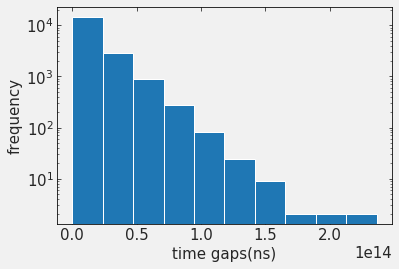

In [49]:
ax=eqGoodData['gaps'].plot(kind="hist",logy="True")
ax.set_ylabel('frequency')
ax.set_xlabel('time gaps(ns)')

# data analysis

### important: the paper does not do it but I want you to formally choose a threshold before you do this test. Choose a p-value (=$\alpha$ thresold: call your variable ```alpha```) of 3-$\sigma$.

In [0]:
## setting the threshold value 
alpha =0.03

Follow the instructions (algorithm) in **Section 3 paragraph 3** and compare your results with the results in table 1 with a threshold  of = 0.01 and 0.001

Do it for all 5 magnitude thresholds as indicated in the paper (and in Table 1).

Note that the x axis in plot Fig 1 is in _log space_. Use ```np.log10()``` to take the logarithm of the time gaps.

The pseudocode for the algorithm is [here](https://github.com/fedhere/DSPS/blob/master/HW3/Corral2018_pseudocode.md).


Reproduce the paper Fig 1 and Table 1. In the Table report the size of each dataset after cleaning the value of the statistic and the p-value, as done in Corral 2018. Use the scipy function for the 2 sample KS test. (resources [here](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0) to learn about the table syntax in markdown)

--We will make lists of stationary periods with the start dates in one list and end date in the other list in order to use it for analysis.

In [0]:
## stationary period start date
st_start = ['1984-01-01','1990-04-20','1994-08-08','1996-02-06','1997-01-01','1997-10-01', '1998-04-02', '2000-07-19','2000-11-24', '2001-08-08', '2002-07-02']
## stationary period end date
st_end = ['1986-07-02', '1992-02-06', '1995-08-08', '1996-07-01','1997-08-08', '1998-02-24', '1999-05-08', '2000-10-19','2001-04-02', '2002-01-1', '2002-12-31']

-

We will define all the functions here to get the good data and perform KS test and finally plotting the histogram.
To do the KS test we will use the python build in function 

"stats.ks_2samp(Sample_1, Sample_2)"

this will return the p values and distance between the two sample in the commulative space

In [0]:
def get_eqGoodData(Magnitude):
    '''
    This function will take the sample data points within the stationary periods 
    and return the Dataframe with date time and gaps points with magnitude greater than identified.
    '''

    df = eqdata[eqdata.magnitude >= Magnitude]
    
    df = df.set_index(df['datetime']) ## index of datetime column
    
    good_data = [] ## empty list 
    for i_,stb in enumerate(st_start):
        # events for the stationary periods
        df_st = df.loc[st_start[i_]:st_end[i_]]
        gaps = np.diff(df_st['datetime'].astype(int)) 

        df_st_withgaps = df_st.drop(df_st.index[0])
        df_st_withgaps['gaps'] = gaps
        good_data.append(df_st_withgaps)

    # appending the stacked data into a dataframe
    eqGoodData = pd.concat(good_data)
    return eqGoodData

def get_sample(m, M):
    '''
    This function will take m and M values and return the scaled sample which we need
    in order to perform the KS test.
    '''
    sample_scaled = []
    for Mk in M:
        eqGoodData = get_eqGoodData(Mk)
        temp = eqGoodData
#         for i in range(2):
        t_mean = np.mean(temp.gaps)
        temp = temp[temp['gaps'] >= m*t_mean]  ## removing the small gaps
            
            
        temp_new_mean = np.mean(temp.gaps)
        gaps_scaled = temp['gaps'].values / temp_new_mean  # scaling the gaps by the new mean
        sample_scaled.append(gaps_scaled)
    
    return sample_scaled

def Perform_KS_test(m, M):
    '''
    Calculates the KS test, It will use get_sample function.
    It will take m and Magnitude as input and return the scaled sample, pvalues and the distance between samples
    in commulative space
    '''
    scaled_sample = get_sample(m, M)
    ## make empty arrays 
    p_value = np.zeros((len(M), len(M)))
    d_value = np.zeros((len(M), len(M)))
    for i in range(len(M)):
        for j in range(i,len(M)):
            ## python build in function to perform KS test, it will return the p values 
            ## and the distance between two distribution in the commulative space
            d_val, p_val = stats.ks_2samp(scaled_sample[i], scaled_sample[j])
            p_value[i, j] =  p_val
            p_value[j, i] =  p_val
            d_value[i, j] =  d_val
            d_value[j, i] =  d_val
    return scaled_sample, d_value, p_value

def plot_hist(data_sample):
    '''
    plot the histogram of given sample.
    This function will not return anything and will just plot the data.
    you will have to change the legends and labels inside the function if you want to change them.
    '''
    
    pl.figure(figsize=(7, 5)) ## making fig
    
    for i in range(len(data_sample)):
#         data_sample =  np.log10(data_sample[i])
        hist = pl.hist(np.log10(data_sample[i]), bins=100, cumulative=True, histtype='step', density=True, label=('M$\geq$%0.1f'%M[i])) 
    
    pl.legend(loc='upper left')
    pl.xlabel('x = $Log_{10}(R_s\\tau$)')
    pl.ylabel('$P(x)$')

# For m = 0.01

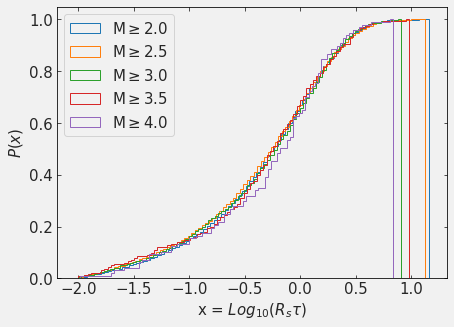

In [53]:
## given value of m
m = 0.01
## given values of Magnitude 
M = [2.0, 2.5, 3.0, 3.5, 4.0]
# Performing KS test for given m and M values
data_sample, dvalue, pval_m_001 = Perform_KS_test(m, M)

plot_hist(data_sample)

Note : The lines droping to zero at the end is due to the fact that we are plotting a histogram of histtype 'step', which is the easiest way we found to plot the commulative distribution plot. Also the graph saturates at 1 because of the rescaling.


#### There is very small statistical significant differences between the distributions as can be seen from the commulative plot above. The p-values are bit different from the one in the paper but the distribution looks quite similar. The reason for the difference in the p values can be due to the fact that we have used different data and the raw data was not available for the paper.

# For Table:

In [54]:
for i in data_sample:
    print (len(i))

18028
5392
1333
375
97


In [55]:
dvalue

array([[0.        , 0.02095516, 0.02218201, 0.03258043, 0.08769177],
       [0.02095516, 0.        , 0.03134259, 0.04167755, 0.10311955],
       [0.02218201, 0.03134259, 0.        , 0.0424106 , 0.079342  ],
       [0.03258043, 0.04167755, 0.0424106 , 0.        , 0.08186942],
       [0.08769177, 0.10311955, 0.079342  , 0.08186942, 0.        ]])

In [56]:
pval_m_001

array([[1.        , 0.05151584, 0.57000811, 0.82437386, 0.43128026],
       [0.05151584, 1.        , 0.24066967, 0.56766168, 0.24904121],
       [0.57000811, 0.24066967, 1.        , 0.65936574, 0.60215284],
       [0.82437386, 0.56766168, 0.65936574, 1.        , 0.66163228],
       [0.43128026, 0.24904121, 0.60215284, 0.66163228, 1.        ]])

# Table similar to one in the paper:

| m=0.01          |       N  | M $\geq$ 2.0 | M $\geq$ 2.5 | M $\geq$ 3.0 | M $\geq$ 3.5 | M $\geq$ 4.0 |
| ----------------|-------- | ------------ | ------------ | ------------ | ------------ | ------------ |
| M $\geq$ 2.0    |   18010 | ---          | 61.1%        | 54.9%        | 86.3%        |43.3%         |
| M $\geq$ 2.5    |    5381 | 0.020        | ---          | 23.8%        | 55.8%        | 25.6%        |
| M $\geq$ 3.0    |    1329 | 0.022        | 0.031        | ---          | 65.4%        | 61.7%        |
| M $\geq$ 3.5    |     374 | 0.031        | 0.042        | 0.042        | ---          | 67.8%        |
| M $\geq$ 4.0    |      97 | 0.088        | 0.102        | 0.078        | 0.081        | ---          |

#### Table . KS statistic. The value below the table are the p values and the values above the table are d values foe m = 0.01.

# Redoing it for threshold m = 0.001

Repeating the same procedure as above but for m = 0.001

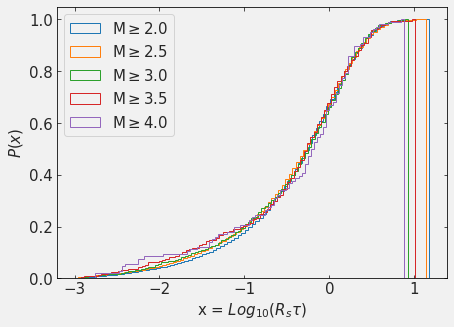

In [57]:
m = 0.001
## given values of Magnitude 
M = [2.0, 2.5, 3.0, 3.5, 4.0]
# Performing KS test for given m and M values
data_sample, dvalue, pval_m_0001 = Perform_KS_test(m, M)

plot_hist(data_sample)

#### Figure . Rescaled inter-event-time cumulative distributions for $m$ = 0.001. 

# For making the table

In [58]:
## length of the sample data
for i in data_sample:
    print (len(i))

18773
5642
1408
401
106


In [59]:
dvalue

array([[0.        , 0.02316098, 0.02717973, 0.05161124, 0.06762573],
       [0.02316098, 0.        , 0.02744383, 0.033314  , 0.08264164],
       [0.02717973, 0.02744383, 0.        , 0.04039617, 0.06379985],
       [0.05161124, 0.033314  , 0.04039617, 0.        , 0.06683762],
       [0.06762573, 0.08264164, 0.06379985, 0.06683762, 0.        ]])

In [60]:
pval_m_0001

array([[1.        , 0.01871629, 0.28419969, 0.24007386, 0.7060156 ],
       [0.01871629, 1.        , 0.35965596, 0.79389139, 0.4596036 ],
       [0.28419969, 0.35965596, 1.        , 0.67981434, 0.80457758],
       [0.24007386, 0.79389139, 0.67981434, 1.        , 0.83558756],
       [0.7060156 , 0.4596036 , 0.80457758, 0.83558756, 1.        ]])

# Table similar to one in the paper:


| m=0.001         |    N    | M $\geq$ 2.0 | M $\geq$ 2.5 | M $\geq$ 3.0 | M $\geq$ 3.5 | M $\geq$ 4.0 |
| ----------------|-------- | ------------ | ------------ | ------------ | ------------ | ------------ |
| M $\geq$ 2.0    |   18010 | ---          | 2.1%         | 28.3%        | 23.9%        | 70.6%        |
| M $\geq$ 2.5    |    5381 | 0.022        | ---          | 36.5%        | 78.0%        | 46.1%        |
| M $\geq$ 3.0    |    1329 | 0.027        | 0.027        | ---          | 68.0%        | 80.4%        |
| M $\geq$ 3.5    |     374 | 0.051        | 0.034        | 0.040        | ---          | 83.5%        |
| M $\geq$ 4.0    |      97 | 0.067        | 0.082        | 0.063        | 0.067        | ---          |

#### Table . KS statistic. The value below the table are the p values and the values above the table are d values foe m = 0.001.

### 667 students ( or extra credits)

Organize your result for different magnitude threshold in a numpy array (it should be a 5x5 array) for both cutoffs (0.01 and 0.001). Each of these arrays should contain the p-value for the pair of distributions i,j in cell \[i\]\[j\] and \[j\]\[i\]. Use ```imshow``` to visualize this 2D data. FIrst visualize the matrix itself as done below.

## We already arranged the data in 5$\times$5 array, now we can plot it:

## Visulization of the p values:

### KS test for m = 0.001

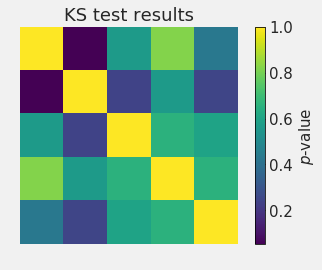

In [61]:
pl.imshow((pval_m_001));
pl.axis('off')
cb = pl.colorbar()
cb.ax.set_ylabel(r'$p$-value')
pl.title("KS test results");

### As can be seen from the plot above all p values are larger than the threshold. The null hypothesis for KS test fails. We can not reject the scaling hypothesis. All the sample sets are taken from the same population.


Now visualize the result as a matrix where the cells are white if the results is not statistically significant and red otherwise. 
After doing it fot the set alpha threshold, lower your alpha threshold so that at least one pair of distribution has a statistically significant difference. **Warning!! this is an unethocal horrifying practice! Once you chose your significance threshold you are never allowed to change it! Why? Discuss**

In [62]:
## Using the broadcasting techinque to ckeck the p values whether they are within threshold 
Test_m_001 = pval_m_001 > alpha
Test_m_001

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

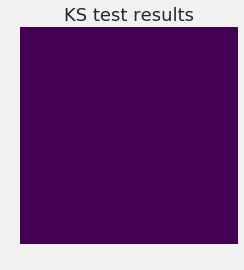

In [63]:
pl.imshow(Test_m_001)
pl.axis('off')
# cb = pl.colorbar()
# cb.ax.set_ylabel(r'$p$-value')
pl.title("KS test results");

### KS test for m = 0.0001

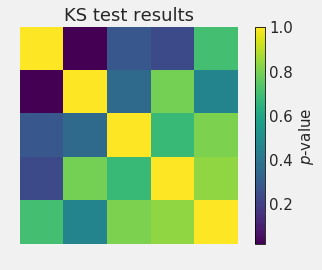

In [64]:
pl.imshow((pval_m_0001));
pl.axis('off')
cb = pl.colorbar()
cb.ax.set_ylabel(r'$p$-value')
pl.title("KS test results");

### As can be seen from the plot above all p values are larger than threshold. The null hypothesis for KS test fails. We can not reject the scaling hypothesis. All the sample sets are taken from the same population.

In [65]:
## Using the broadcasting techinque to ckeck the p values whether they are within threshold 
Test_m_0001 = pval_m_0001 > alpha
Test_m_0001

array([[ True, False,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

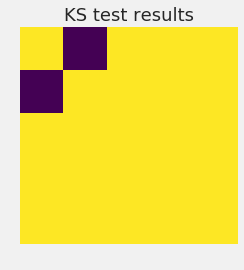

In [66]:
pl.imshow(Test_m_0001)
pl.axis('off')
# cb = pl.colorbar()
# cb.ax.set_ylabel(r'$p$-value')
pl.title("KS test results");

### Once you chose your significance threshold you are never allowed to change it Changing the threshold after you perform the KS test is unethical because you can always select the threshold and tune it to fit your data once you have the results and that should not happen. 